In [42]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set_style("white")
plt.rc('font', size=12)

In [43]:
def create_pie_plot(fig, gs, x_value, y_value, column, df_data, palette_values):
    ax_data = fig.add_subplot(gs[x_value, y_value])
    #ax_data.set_title(column)
    count_column = df_data[column].value_counts()
    labels = count_column.index.tolist()
    counts = count_column.values.tolist()
    colors = sns.color_palette(palette_values)[0:len(counts)+1]

    ax_data.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')

In [44]:
df_data = pd.read_csv("../processed_data/1_processed_data.csv")
df_data.head()

,Name,ID,Attachment,ITERS range,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Sensitivity,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,Maximiliano-Cárdenas-Catelicán,1,Insecure,Average Quality,Male,20.076728,31.719207,23.453752,25.016903,2,3.884615,21.765240,28.368055,6.602815
1,Martín-Pérez-González,4,Secure,Average Quality,Male,28.584920,82.400761,28.361209,19.363161,3,3.807692,28.473065,50.881961,22.408896
2,Noemí-Cárdenas-Gutierrez,5,Secure,Average Quality,Female,161.424693,46.867951,39.006348,52.728307,5,3.807692,100.215520,49.798129,-50.417391
3,Jasna-Mansilla-Mansilla,7,Insecure,Average Quality,Female,26.747838,47.213491,21.599136,35.942378,1,3.846154,24.173487,41.577934,17.404447
4,Jhampiere-Largacha-Yañez,11,NaN,Average Quality,Male,118.901337,47.213491,37.125222,382.715268,5,3.961538,78.013279,214.964380,136.951100


In [125]:
df_data["Gender"] = df_data["Gender"].replace(
    {"Female": "Girl",
     "Male": "Boy"}
)

df_data["Attachment"] = df_data["Attachment"].replace(
    {"Secure": "Secure (SA)",
     "Insecure" : "Insecure (IA)"}
)

df_data["ITERS range"] = df_data["ITERS range"].replace({
   "Average Quality" : "Mean Quality"
})

In [123]:
df_data.describe()

,ID,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,32.514286,39.749421,47.213491,39.006348,52.728307,3.307692,39.377884,49.970899,10.593015
std,19.977004,32.640904,39.429564,29.965480,65.579455,0.593722,24.869720,39.711549,36.686554
min,1.000000,12.355559,16.153182,13.673068,14.171518,2.307692,15.981670,18.293268,-50.417391
25%,16.500000,19.697087,25.405997,22.526444,24.264242,2.826923,21.887480,26.274927,-6.440452
50%,29.000000,26.747838,35.309869,28.361209,32.712742,3.461538,29.554870,40.239442,4.891590
75%,51.500000,52.881324,51.503357,39.006348,52.728307,3.807692,50.061815,50.340045,15.941210
max,66.000000,161.424693,224.737565,156.480231,382.715268,3.961538,120.080399,214.964380,136.951100


In [127]:
df_data[df_data["Attachment"] != "Secure (SA)"].describe()

,ID,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,40.058824,36.277044,46.047423,38.232219,73.698676,3.445701,37.254631,59.873050,22.618418
std,22.873212,28.316629,51.189320,36.404040,89.675935,0.584732,27.847149,54.035978,46.668555
min,1.000000,12.355559,16.153182,13.673068,15.249613,2.346154,18.906715,18.293268,-14.192381
25%,18.000000,19.653971,21.808747,21.599136,25.016903,2.923077,20.707741,24.478114,-6.153204
50%,51.000000,25.605318,26.530013,26.174031,35.942378,3.807692,24.173487,38.614821,4.891590
75%,60.000000,39.749421,46.679820,37.125222,81.253212,3.884615,40.406768,73.899634,23.639694
max,66.000000,118.901337,224.737565,156.480231,382.715268,3.961538,120.080399,214.964380,136.951100


In [46]:
df_data["Sensitivity"]= df_data["Sensitivity"].replace({0:"0-1", 1:"0-1", 2: "2-3", 3: "2-3",
                                4: "4-5", 5:"4-5", 6: "5+"})

In [104]:
df1 = df_data.groupby(by=["Attachment", "ITERS range"]).count()*100/len(df_data)
df1 = df1.round(decimals=2)

matrix_data = []

for index in df1.index:
    row = [f"{index[0]}-{index[1]}", index[0], index[1], df1["Name"][index]]
    matrix_data.append(row)
df_attachmen_itters = pd.DataFrame(data=matrix_data, columns=["Group", "Attachment", "ITERS range", "Frequency"])

df2 = df_data.groupby(by=["Attachment", "Gender"]).count()*100/len(df_data)
df2 = df2.round(decimals=2)

matrix_data = []

for index in df2.index:
    row = [f"{index[0]}-{index[1]}", index[0], index[1], df2["Name"][index]]
    matrix_data.append(row)
df_attachmen_gender = pd.DataFrame(data=matrix_data, columns=["Group", "Attachment", "Gender", "Frequency"])

df3 = df_data.groupby(by=["ITERS range", "Gender"]).count()*100/len(df_data)
df3 = df3.round(decimals=2)

matrix_data = []

for index in df3.index:
    row = [f"{index[0]}-{index[1]}", index[0], index[1], df3["Name"][index]]
    matrix_data.append(row)
df_iters_gender = pd.DataFrame(data=matrix_data, columns=["Group", "ITERS range", "Gender", "Frequency"])

df4 = df_data.groupby(by=["Sensitivity", "Attachment"]).count()*100/len(df_data)
df4 = df4.round(decimals=2)

matrix_data = []

for index in df4.index:
    row = [f"{index[0]}-{index[1]}", index[0], index[1], df4["Name"][index]]
    matrix_data.append(row)
df_sensitivity_attachment = pd.DataFrame(data=matrix_data, columns=["Group", "Sensitivity", "Attachment", "Frequency"])

In [48]:
palette_values = ['#E3A6ED', '#ADD2F7', '#A8E0AF', '#F7EAAD', '#F0AF9F']

colors = sns.color_palette(palette_values)
colors

[(0.8901960784313725, 0.6509803921568628, 0.9294117647058824),
 (0.6784313725490196, 0.8235294117647058, 0.9686274509803922),
 (0.6588235294117647, 0.8784313725490196, 0.6862745098039216),
 (0.9686274509803922, 0.9176470588235294, 0.6784313725490196),
 (0.9411764705882353, 0.6862745098039216, 0.6235294117647059)]

### Figure 01

In [100]:
df_attachmen_gender

,Group,Attachment,Gender,Frequency
0,Insecure (IA)-Boy,Insecure (IA),Boy,14.29
1,Insecure (IA)-Girl,Insecure (IA),Girl,11.43
2,Secure (SA)-Boy,Secure (SA),Boy,17.14
3,Secure (SA)-Girl,Secure (SA),Girl,34.29


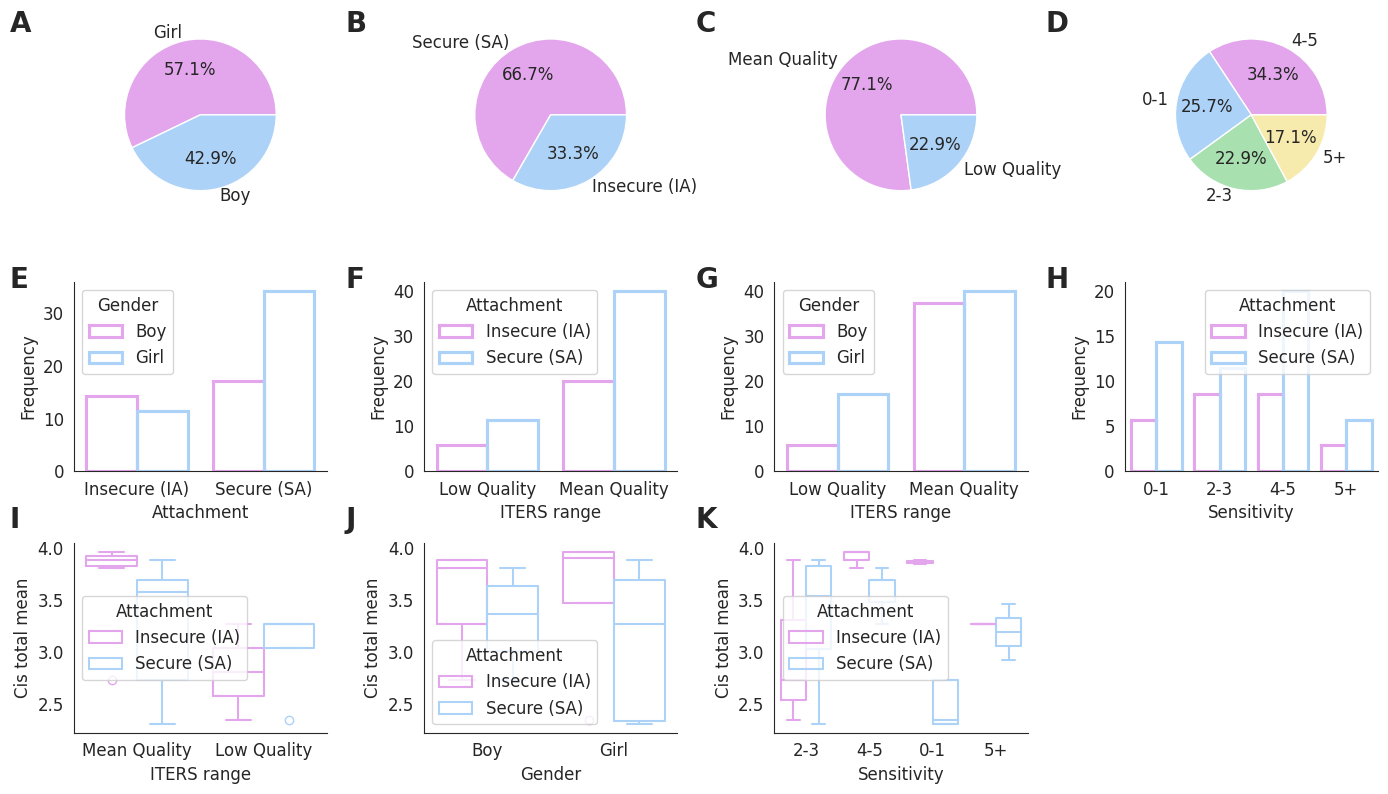

In [115]:
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(3, 4, figure=fig)

y_value=0
for column in ['Gender', "Attachment", 'ITERS range', 'Sensitivity']:

    create_pie_plot(fig, gs, 0, y_value, column, df_data, palette_values)
    y_value+=1

ax_data = fig.add_subplot(gs[1, 0])
sns.barplot(ax=ax_data, data=df_attachmen_gender, x="Attachment", y="Frequency", hue="Gender", fill=False, palette=colors)

ax_data = fig.add_subplot(gs[1, 1])
sns.barplot(ax=ax_data, data=df_attachmen_itters, hue="Attachment", y="Frequency", x="ITERS range", fill=False, palette=colors)

ax_data = fig.add_subplot(gs[1, 2])
sns.barplot(ax=ax_data, data=df_iters_gender, hue="Gender", y="Frequency", x="ITERS range", fill=False, palette=colors)

ax_data = fig.add_subplot(gs[1, 3])
sns.barplot(ax=ax_data, data=df_sensitivity_attachment, hue="Attachment", y="Frequency", x="Sensitivity", fill=False, palette=colors)

ax_data5 = fig.add_subplot(gs[2, 0])
ax_data6 = fig.add_subplot(gs[2, 1])
ax_data7 = fig.add_subplot(gs[2, 2])

sns.boxplot(ax=ax_data5, data=df_data, hue="Attachment", x="ITERS range", y="Cis total mean", fill=False, palette=colors)
sns.boxplot(ax=ax_data6, data=df_data, hue="Attachment", x="Gender", y="Cis total mean", fill=False, palette=colors)
sns.boxplot(ax=ax_data7, data=df_data, hue="Attachment", x="Sensitivity", y="Cis total mean", fill=False, palette=colors)

sns.despine()
fig.text(0.01, 0.99, "A", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.25, 0.99, "B", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.5, 0.99, "C", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.75, 0.99, "D", ha='left', va='top', fontsize=20, fontweight='bold')

fig.text(0.01, 0.67, "E", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.25, 0.67, "F", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.5, 0.67, "G", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.75, 0.67, "H", ha='left', va='top', fontsize=20, fontweight='bold')

fig.text(0.01, 0.37, "I", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.25, 0.37, "J", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.5, 0.37, "K", ha='left', va='top', fontsize=20, fontweight='bold')

plt.tight_layout()

In [50]:
df_data.columns

Index(['Name', 'ID', 'Attachment', 'ITERS range', 'Gender', 'IgA D1-Morning',
       'IgA D1-Afternoon', 'IgA D2-Morning', 'IgA D2-Afternoon', 'Sensitivity',
       'Cis total mean', 'Average IgA Morning', 'Average IgA Afternoon',
       'Average Difference IgA'],
      dtype='object')

In [51]:
df1 = df_data[['Attachment', 'ITERS range', 'Gender', 'Sensitivity',
       'Cis total mean', 'Average IgA Morning']]

df1.columns = ['Attachment', 'ITERS-R', 'Gender', 'Sensitivity',
       'Cis total mean', 'Average SIgA']

df2 = df_data[['Attachment', 'ITERS range', 'Gender', 'Sensitivity',
       'Cis total mean', 'Average IgA Afternoon']]

df2.columns = ['Attachment', 'ITERS-R', 'Gender', 'Sensitivity',
       'Cis total mean', 'Average SIgA']

df1["Time"] = "Morning"
df2["Time"] = "Afternoon"

df_values = pd.concat([df1, df2], axis=0)
df_values

,Attachment,ITERS-R,Gender,Sensitivity,Cis total mean,Average SIgA,Time
0,Insecure (IA),Mean Quality,Boy,2-3,3.884615,21.765240,Morning
1,Secure (SA),Mean Quality,Boy,2-3,3.807692,28.473065,Morning
2,Secure (SA),Mean Quality,Girl,4-5,3.807692,100.215520,Morning
3,Insecure (IA),Mean Quality,Girl,0-1,3.846154,24.173487,Morning
4,NaN,Mean Quality,Boy,4-5,3.961538,78.013279,Morning
...,...,...,...,...,...,...,...
30,NaN,Mean Quality,Boy,5+,2.923077,73.899634,Afternoon
31,Insecure (IA),Mean Quality,Girl,4-5,3.961538,24.241804,Afternoon
32,Insecure (IA),Mean Quality,Boy,0-1,3.884615,20.066422,Afternoon
33,Insecure (IA),Mean Quality,Girl,4-5,3.961538,25.636912,Afternoon


In [52]:
df_values = df_values.dropna()
df_values.shape

(54, 7)

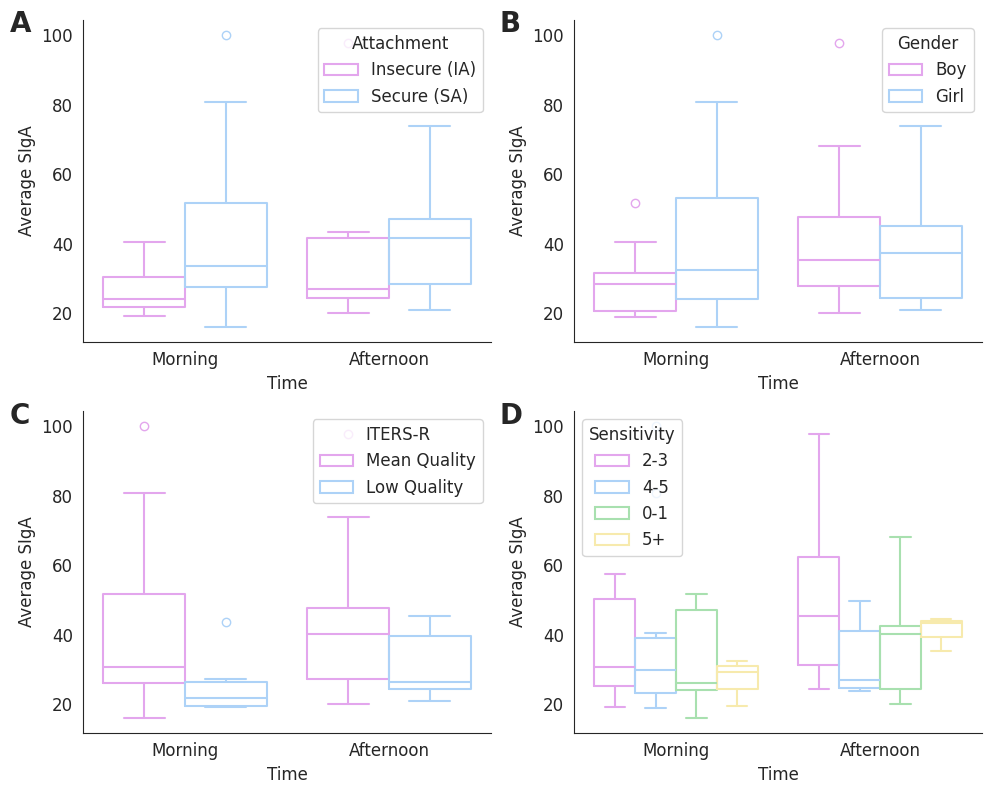

In [122]:
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 2, figure=fig)

# Attachment
ax_data1 = fig.add_subplot(gs[0, 0])
ax_data2 = fig.add_subplot(gs[0, 1])
ax_data3 = fig.add_subplot(gs[1, 0])
ax_data4 = fig.add_subplot(gs[1, 1])

sns.boxplot(ax=ax_data1, data=df_values, hue="Attachment", x="Time", y="Average SIgA", fill=False, palette=colors)
sns.boxplot(ax=ax_data2, data=df_values, hue="Gender", x="Time", y="Average SIgA", fill=False, palette=colors)
sns.boxplot(ax=ax_data3, data=df_values, hue="ITERS-R", x="Time", y="Average SIgA", fill=False, palette=colors)

sns.boxplot(ax=ax_data4, data=df_values, hue="Sensitivity", x="Time", y="Average SIgA", fill=False, palette=colors)

sns.despine()

fig.text(0.01, 0.99, "A", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.50, 0.99, "B", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.01, 0.5, "C", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.5, 0.5, "D", ha='left', va='top', fontsize=20, fontweight='bold')

plt.tight_layout()

### Figure 3

In [ ]:
df_data_cortisol = pd.read_csv("../raw_data/cortisol/raw_data_measures.csv")
df_data_cortisol = df_data_cortisol[df_data_cortisol["Cortisol (pg/mL)"]<20]
df_merge = df_data_cortisol.merge(right=df_data, left_on="Sample", right_on="ID")
df_merge = df_merge.drop(columns=["Attachment_x"])
df_merge.rename(columns={"Attachment_y": "Attachment"}, inplace=True)

,Sample,Cortisol (pg/mL),Name,ID,Attachment,ITERS range,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Sensitivity,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,16,3.59,Danna-Merkle-Vargas,16,Secure (SA),Mean Quality,Girl,79.173752,108.512940,35.780159,39.270931,2-3,2.307692,57.476955,73.891936,16.414980
1,1,5.62,Maximiliano-Cárdenas-Catelicán,1,Insecure (IA),Mean Quality,Boy,20.076728,31.719207,23.453752,25.016903,2-3,3.884615,21.765240,28.368055,6.602815
2,7,1.83,Jasna-Mansilla-Mansilla,7,Insecure (IA),Mean Quality,Girl,26.747838,47.213491,21.599136,35.942378,0-1,3.846154,24.173487,41.577934,17.404447
3,5,2.28,Noemí-Cárdenas-Gutierrez,5,Secure (SA),Mean Quality,Girl,161.424693,46.867951,39.006348,52.728307,4-5,3.807692,100.215520,49.798129,-50.417391
4,63,7.08,José-Santos-Ramírez,63,Insecure (IA),Mean Quality,Boy,24.012107,21.808747,28.427144,18.324096,0-1,3.884615,26.219626,20.066422,-6.153204
5,27,2.26,Isabella-Oyarzún-Villalobos,27,Secure (SA),Low Quality,Girl,53.147518,37.759187,34.127202,52.728307,2-3,3.269231,43.637360,45.243747,1.606387
6,23,4.76,María-Levet-Espinoza,23,Secure (SA),Mean Quality,Girl,78.975857,56.250589,82.673910,39.015096,4-5,3.692308,80.824884,47.632842,-33.192041


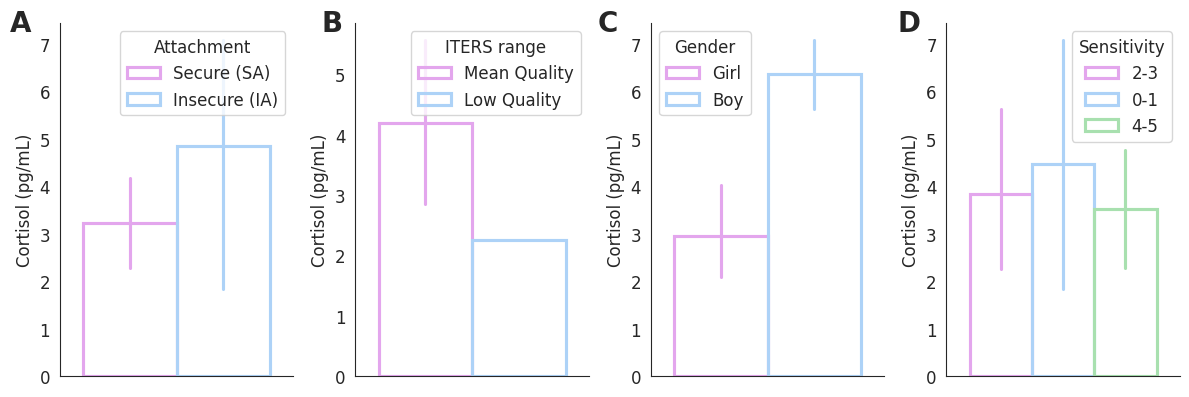

In [153]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(1, 4, figure=fig)

ax_data1 = fig.add_subplot(gs[0])
ax_data2 = fig.add_subplot(gs[1])
ax_data3 = fig.add_subplot(gs[2])
ax_data4 = fig.add_subplot(gs[3])

sns.barplot(ax=ax_data1, data=df_merge, y="Cortisol (pg/mL)", hue="Attachment", fill=False, palette=colors)
sns.barplot(ax=ax_data2, data=df_merge, y="Cortisol (pg/mL)", hue="ITERS range", fill=False, palette=colors)
sns.barplot(ax=ax_data3, data=df_merge, y="Cortisol (pg/mL)", hue="Gender", fill=False, palette=colors)
sns.barplot(ax=ax_data4, data=df_merge, y="Cortisol (pg/mL)", hue="Sensitivity", fill=False, palette=colors)

sns.despine()

fig.text(0.01, 0.99, "A", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.27, 0.99, "B", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.5, 0.99, "C", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.75, 0.99, "D", ha='left', va='top', fontsize=20, fontweight='bold')

plt.tight_layout()

In [143]:
df_merge.corr(numeric_only=True)

,Sample,Cortisol (pg/mL),ID,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
Sample,1.000000,0.588290,1.000000,-0.308331,-0.303309,0.067960,-0.423722,0.051591,-0.229114,-0.408154,-0.000120
Cortisol (pg/mL),0.588290,1.000000,0.588290,-0.433800,-0.307789,0.090540,-0.837766,0.229450,-0.324073,-0.567298,0.006507
ID,1.000000,0.588290,1.000000,-0.308331,-0.303309,0.067960,-0.423722,0.051591,-0.229114,-0.408154,-0.000120
IgA D1-Morning,-0.308331,-0.433800,-0.308331,1.000000,0.336780,0.386640,0.710080,-0.159820,0.949538,0.543160,-0.764701
IgA D1-Afternoon,-0.303309,-0.307789,-0.303309,0.336780,1.000000,0.220825,0.299647,-0.873137,0.350603,0.933634,0.206114
IgA D2-Morning,0.067960,0.090540,0.067960,0.386640,0.220825,1.000000,0.255981,-0.034417,0.656390,0.277441,-0.593938
IgA D2-Afternoon,-0.423722,-0.837766,-0.423722,0.710080,0.299647,0.255981,1.000000,-0.298628,0.667934,0.621529,-0.378360
Cis total mean,0.051591,0.229450,0.051591,-0.159820,-0.873137,-0.034417,-0.298628,1.000000,-0.142444,-0.829081,-0.383428
Average IgA Morning,-0.229114,-0.324073,-0.229114,0.949538,0.350603,0.656390,0.667934,-0.142444,1.000000,0.538685,-0.827556
Average IgA Afternoon,-0.408154,-0.567298,-0.408154,0.543160,0.933634,0.277441,0.621529,-0.829081,0.538685,1.000000,0.027177
